# 读取图片的输入（灰度图，数组文件）

In [1]:
import numpy as np
data=np.loadtxt('mnist_test.csv',delimiter=',')
x=data[:,1:]
y=data[:,0:1].astype(int)
y

array([[7],
       [2],
       [1],
       ...,
       [4],
       [5],
       [6]])

In [8]:
# 对label进行独热编码后的数据 one hot encoding
Y=np.eye(10)[y.T[0]]

<IPython.core.display.Javascript object>


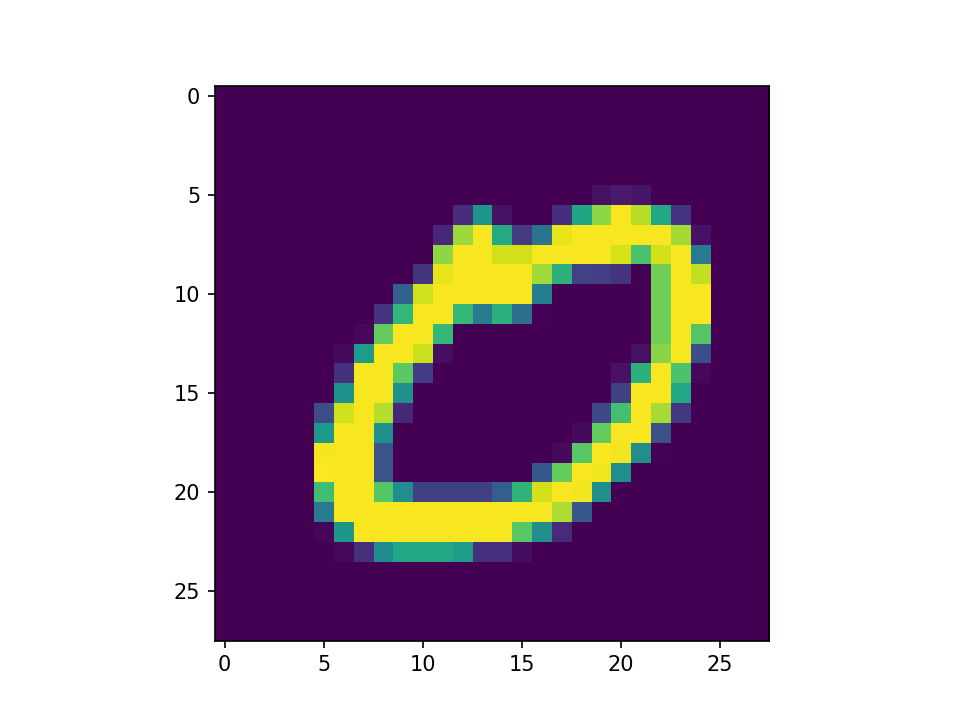

In [5]:
## 数据可视化
%matplotlib notebook
import matplotlib.pyplot as plt
plt.imshow(x[-3].reshape(28,28))

# 准备交给TensorFlow框架训练

In [7]:
## 导入TensorFlow的包
from tensorflow.keras.models import Sequential#顺序模型：从左边输入，从右边输出
from tensorflow.keras.layers import Dense,Activation#Dense：线性输入输出；Activation：激活函数
import numpy as np

## 创建模型
model=Sequential()#创建一个顺序模型
## 指定模型的输入和输出
model.add(Dense(10,input_shape=(784,)))#输入784个数据，输出10个数据
## 制定模型的激活函数
model.add(Activation('softmax'))#多分类要使用softmax的激活函数
## 打印模型的概要信息
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [22]:
## 设置模型的训练参数
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])#多分类
## 训练模型
model.fit(x,Y,epochs=15)#训练15轮

Epoch 1/15
313/313 [==============================] - 1s 959us/step - loss: 0.3900 - accuracy: 0.9879
Epoch 2/15
313/313 [==============================] - 0s 904us/step - loss: 0.2704 - accuracy: 0.9914
Epoch 3/15
313/313 [==============================] - 0s 926us/step - loss: 0.2588 - accuracy: 0.9913
Epoch 4/15
313/313 [==============================] - 0s 917us/step - loss: 0.3459 - accuracy: 0.9897
Epoch 5/15
313/313 [==============================] - 0s 993us/step - loss: 0.2725 - accuracy: 0.9905
Epoch 6/15
313/313 [==============================] - 0s 938us/step - loss: 0.4968 - accuracy: 0.9867
Epoch 7/15
313/313 [==============================] - 0s 930us/step - loss: 0.4071 - accuracy: 0.9896
Epoch 8/15
313/313 [==============================] - 0s 969us/step - loss: 0.3673 - accuracy: 0.9892
Epoch 9/15
313/313 [==============================] - 0s 987us/step - loss: 0.6512 - accuracy: 0.9870
Epoch 10/15
313/313 [==============================] - 0s 931us/step - loss: 0.330

In [23]:
model.predict(x[0].reshape(1,784))

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

<IPython.core.display.Javascript object>


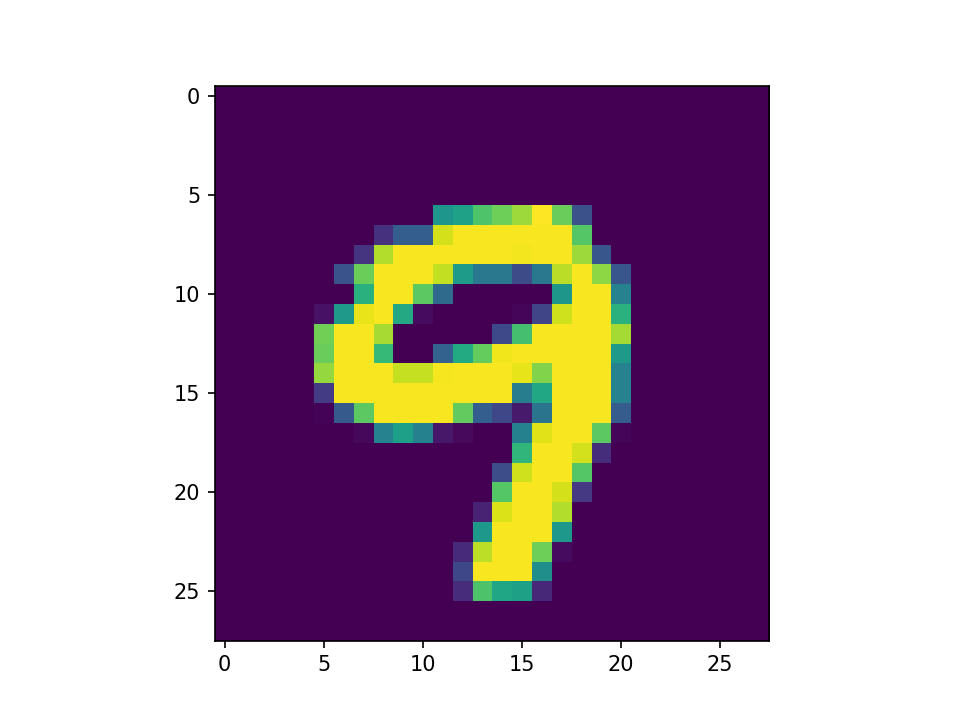

9


In [24]:
index=np.random.randint(10000)
%matplotlib notebook
plt.imshow(x[index].reshape(28,28))
plt.show()
print(np.argmax(model.predict(x[index].reshape(1,784))))

# 创建一个新的网络模型

In [26]:
## 创建模型
model=Sequential()#创建一个顺序模型
## 指定模型的输入和输出
model.add(Dense(30,input_shape=(784,)))#输入784个数据，输出30个数据
## 制定模型的激活函数
model.add(Activation('relu'))#多分类要使用softmax的激活函数
model.add(Dense(10))#输入30个数据，输出10个数据
model.add(Activation('softmax'))#多分类最后一行要使用softmax的激活函数

## 打印模型的概要信息
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 30)                23550     
_________________________________________________________________
activation_2 (Activation)    (None, 30)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                310       
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 23,860
Trainable params: 23,860
Non-trainable params: 0
_________________________________________________________________


In [28]:
## 设置模型的训练参数
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])#多分类
## 训练模型
model.fit(x,Y,epochs=100)#训练15轮

Epoch 1/100
313/313 [==============================] - 1s 1ms/step - loss: 0.4608 - accuracy: 0.8917
Epoch 2/100
313/313 [==============================] - 0s 1ms/step - loss: 0.4167 - accuracy: 0.8965
Epoch 3/100
313/313 [==============================] - 0s 1ms/step - loss: 0.4038 - accuracy: 0.9011
Epoch 4/100
313/313 [==============================] - 0s 1ms/step - loss: 0.3594 - accuracy: 0.9122
Epoch 5/100
313/313 [==============================] - 0s 1ms/step - loss: 0.3328 - accuracy: 0.9174
Epoch 6/100
313/313 [==============================] - 0s 1ms/step - loss: 0.3474 - accuracy: 0.9146
Epoch 7/100
313/313 [==============================] - 0s 1ms/step - loss: 0.3421 - accuracy: 0.9191
Epoch 8/100
313/313 [==============================] - 0s 1ms/step - loss: 0.3110 - accuracy: 0.9243
Epoch 9/100
313/313 [==============================] - 0s 1ms/step - loss: 0.3144 - accuracy: 0.9264
Epoch 10/100
313/313 [==============================] - 0s 1ms/step - loss: 0.3011 - accura

313/313 [==============================] - 0s 1ms/step - loss: 0.1272 - accuracy: 0.9698
Epoch 82/100
313/313 [==============================] - 0s 1ms/step - loss: 0.1155 - accuracy: 0.9709
Epoch 83/100
313/313 [==============================] - 0s 1ms/step - loss: 0.1221 - accuracy: 0.9707
Epoch 84/100
313/313 [==============================] - 0s 1ms/step - loss: 0.1276 - accuracy: 0.9694
Epoch 85/100
313/313 [==============================] - 0s 1ms/step - loss: 0.1376 - accuracy: 0.9683
Epoch 86/100
313/313 [==============================] - 0s 1ms/step - loss: 0.1481 - accuracy: 0.9673
Epoch 87/100
313/313 [==============================] - 0s 1ms/step - loss: 0.1432 - accuracy: 0.9672
Epoch 88/100
313/313 [==============================] - 0s 1ms/step - loss: 0.1335 - accuracy: 0.9681
Epoch 89/100
313/313 [==============================] - 0s 1ms/step - loss: 0.1207 - accuracy: 0.9714
Epoch 90/100
313/313 [==============================] - 0s 1ms/step - loss: 0.1321 - accuracy: 

<IPython.core.display.Javascript object>


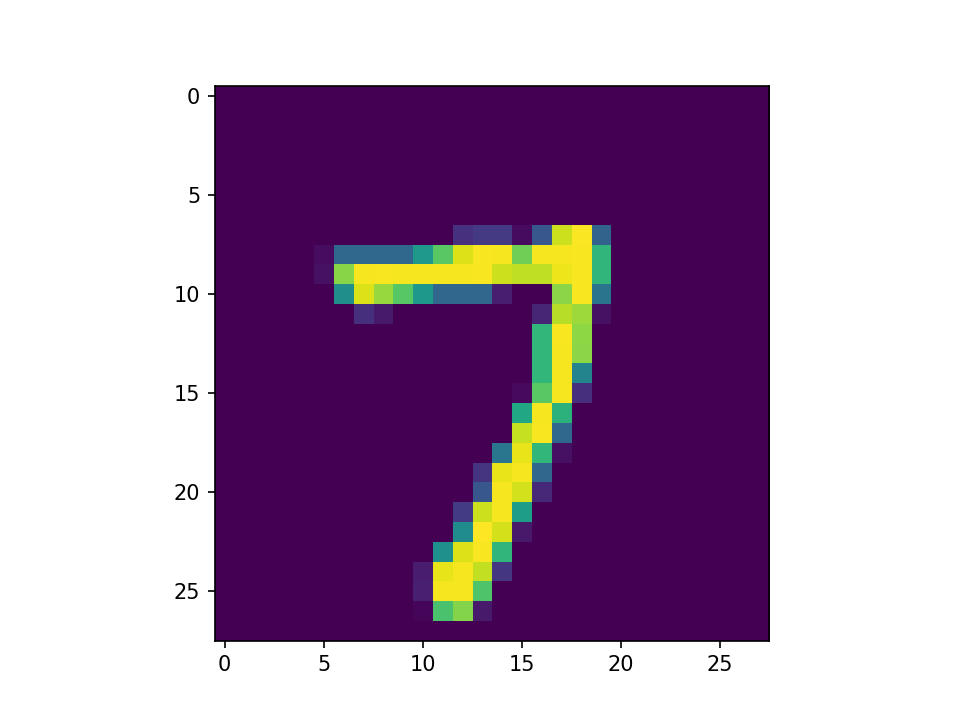

7


In [29]:
index=np.random.randint(10000)
%matplotlib notebook
plt.imshow(x[index].reshape(28,28))
plt.show()
print(np.argmax(model.predict(x[index].reshape(1,784))))

In [30]:
# 超级复杂的神经网络
## 784-2500-2000-1500-1000-500-10
model=Sequential()
model.add(Dense(2500,input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(2000))
model.add(Activation('relu'))
model.add(Dense(1500))
model.add(Activation('relu'))
model.add(Dense(1000))
model.add(Activation('relu'))
model.add(Dense(500))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 2500)              1962500   
_________________________________________________________________
activation_4 (Activation)    (None, 2500)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 2000)              5002000   
_________________________________________________________________
activation_5 (Activation)    (None, 2000)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 1500)              3001500   
_________________________________________________________________
activation_6 (Activation)    (None, 1500)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 1000)             

In [32]:
## 设置模型的训练参数
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])#多分类
## 训练模型
model.fit(x,Y,epochs=10,batch_size=128)#训练10轮

Epoch 1/10
79/79 [==============================] - 8s 99ms/step - loss: 18.5611 - accuracy: 0.7188
Epoch 2/10
79/79 [==============================] - 8s 100ms/step - loss: 0.1660 - accuracy: 0.9484
Epoch 3/10
79/79 [==============================] - 9s 118ms/step - loss: 0.1447 - accuracy: 0.9562
Epoch 4/10
79/79 [==============================] - 9s 117ms/step - loss: 0.0706 - accuracy: 0.9772
Epoch 5/10
79/79 [==============================] - 10s 126ms/step - loss: 0.0501 - accuracy: 0.9824
Epoch 6/10
79/79 [==============================] - 10s 122ms/step - loss: 0.0535 - accuracy: 0.9847
Epoch 7/10
79/79 [==============================] - 9s 118ms/step - loss: 0.0549 - accuracy: 0.9833
Epoch 8/10
79/79 [==============================] - 9s 119ms/step - loss: 0.0372 - accuracy: 0.9890
Epoch 9/10
79/79 [==============================] - 10s 121ms/step - loss: 0.0915 - accuracy: 0.9736
Epoch 10/10
79/79 [==============================] - 10s 126ms/step - loss: 0.0429 - accuracy: 0.

# 概念总结

多个感知机组合生成神经网络  
ANN（神经网络）  
DNN（深度神经网络）  
CNN（卷积神经网络）  